# **House Price Prediction**

***The goal of this project is to create a regression model that are able to accurately estimate the price of the house given the features.***

#**Data Pre-Processing**

**1.Import Libraries**

In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**2.Load dataset**

In [233]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [234]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/House-Price-Prediction-DataSet.csv')
data.shape

(1767, 9)

In [235]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Ready To Move,Palghar,3 BHK,NaN,2400,1.0,1.0,150
1,Built-up Area,Ready To Move,Vangaon,1 BHK,Jae 1hu,520,1.0,1.0,35
2,Super built-up Area,Ready To Move,Palghar,1 BHK,SuVue S,520,1.0,1.0,40
3,Super built-up Area,Ready To Move,Virar,1 BHK,SuVue S,520,1.0,1.0,36
4,Super built-up Area,Ready To Move,Palghar,3 BHK,NaN,1200,1.0,1.0,180


In [236]:
data.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
1762,Plot Area,Under Construction,NaN,3 BHK,NaN,1200,3.0,0.0,130
1763,Built-up Area,Under Construction,Vangaon,1 BHK,NaN,425,1.0,1.0,NaN
1764,Built-up Area,Under Construction,NaN,1 BHK,NaN,580,2.0,0.0,NaN
1765,Carpet Area,Under Construction,Vangaon,1 BHK,NaN,500,1.0,3.0,NaN
1766,Super built-up Area,Under Construction,,2 BHK,NaN,425,1.0,1.0,NaN


In [237]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1767 entries, 0 to 1766
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     1764 non-null   object 
 1   availability  1764 non-null   object 
 2   location      1555 non-null   object 
 3   size          1764 non-null   object 
 4   society       764 non-null    object 
 5   total_sqft    1764 non-null   object 
 6   bath          1750 non-null   float64
 7   balcony       1732 non-null   float64
 8   price         1656 non-null   object 
dtypes: float64(2), object(7)
memory usage: 124.4+ KB


In [238]:
data.drop(columns=['area_type','society', 'bath', 'balcony'],inplace=True)

In [239]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1767 entries, 0 to 1766
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   availability  1764 non-null   object
 1   location      1555 non-null   object
 2   size          1764 non-null   object
 3   total_sqft    1764 non-null   object
 4   price         1656 non-null   object
dtypes: object(5)
memory usage: 69.1+ KB


In [240]:
data.isnull().sum()

availability      3
location        212
size              3
total_sqft        3
price           111
dtype: int64

In [241]:
data['location'] = data['location'].fillna('Thane')

In [242]:
data['size'] = data['size'].fillna('2 BHK')

In [243]:
data['total_sqft'] = data['total_sqft'].fillna(900)

In [244]:
data['price'] = pd.to_numeric(data['price'], errors = 'coerce')

In [245]:
data.isnull().sum()

availability      3
location          0
size              0
total_sqft        0
price           112
dtype: int64

In [246]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1767 entries, 0 to 1766
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   availability  1764 non-null   object 
 1   location      1767 non-null   object 
 2   size          1767 non-null   object 
 3   total_sqft    1767 non-null   object 
 4   price         1655 non-null   float64
dtypes: float64(1), object(4)
memory usage: 69.1+ KB


In [247]:
data.shape  #just  before (13320, 9) 

(1767, 5)

**4. Create BHK column, putting all data of size in BHK with int dtype**

In [248]:
data['bhk']=data['size'].str.split().str.get(0).astype(int) #create bhk and put size data in bhk

In [249]:
data

,availability,location,size,total_sqft,price,bhk
0,Ready To Move,Palghar,3 BHK,2400,150.0,3
1,Ready To Move,Vangaon,1 BHK,520,35.0,1
2,Ready To Move,Palghar,1 BHK,520,40.0,1
3,Ready To Move,Virar,1 BHK,520,36.0,1
4,Ready To Move,Palghar,3 BHK,1200,180.0,3
...,...,...,...,...,...,...
1762,Under Construction,Thane,3 BHK,1200,130.0,3
1763,Under Construction,Vangaon,1 BHK,425,NaN,1
1764,Under Construction,Thane,1 BHK,580,NaN,1
1765,Under Construction,Vangaon,1 BHK,500,NaN,1


In [250]:
data.info() # 5   bhk         1999 non-null  int64  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1767 entries, 0 to 1766
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   availability  1764 non-null   object 
 1   location      1767 non-null   object 
 2   size          1767 non-null   object 
 3   total_sqft    1767 non-null   object 
 4   price         1655 non-null   float64
 5   bhk           1767 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 83.0+ KB


In [251]:
data.head()

,availability,location,size,total_sqft,price,bhk
0,Ready To Move,Palghar,3 BHK,2400,150.0,3
1,Ready To Move,Vangaon,1 BHK,520,35.0,1
2,Ready To Move,Palghar,1 BHK,520,40.0,1
3,Ready To Move,Virar,1 BHK,520,36.0,1
4,Ready To Move,Palghar,3 BHK,1200,180.0,3


In [252]:
data.shape #just before (13320, 5)/ before (13320, 9) 

(1767, 6)

**5.Feature Engineering**

In [253]:
data['total_sqft'].unique()

array(['2400', '520', '1200', '633', '633 - 666', '500', '580 - 650',
       '650', '686', '530', '45.06Sq. Meter', '650 - 665', '610', '625',
       '34.46Sq. Meter', '485', '630', '395', '418', '400', '460', '450',
       '550', '590', '605', '420', '300', '640', '410', '440', '509',
       '425', '760', '435', '674', '810', '470', '700', '510', '654',
       '532', '645', '660', '540', '740', '615', '628', '567', '469',
       '480', '502', '515', '575', '750', '360', '646', '525', '527',
       '635', '545', '1060', '580', '920', '658', '1140', '620', '812',
       '830', '655', '672', '675', '710', '747', '840', '850', '890',
       '613', '664 - 722', '900', '340', '1090', '614', '714', '766',
       '800', '823', '1065', '527 - 639', '708', '2559', '589', '662',
       '671', '602', '755', '375', '595', '551', '596 - 804', '605 - 624',
       '694', '665', '596 - 861', '648', '638', '660 - 780', '720',
       '799 - 803', '664', '750 - 800', '745', '764', '650 - 760', '600',
   

In [254]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1767 entries, 0 to 1766
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   availability  1764 non-null   object 
 1   location      1767 non-null   object 
 2   size          1767 non-null   object 
 3   total_sqft    1767 non-null   object 
 4   price         1655 non-null   float64
 5   bhk           1767 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 83.0+ KB


here we observe that 'total_sqft' contain string value in diff format
float, int like value '1689.28,817' and range value: '540 - 740 '
number and string: 142.84Sq. Meter, 117Sq. Yards, 1Grounds
best strategy is to convert it into number by spliting it

**4.1 Converting 'total_sqft' cat(concatenate) [sequence]feature in numeric**




In [255]:
data['total_sqft'].value_counts()

1200    251
600      88
900      54
700      38
1000     35
       ... 
714       1
1201      1
456       1
908       1
766       1
Name: total_sqft, Length: 304, dtype: int64

In [256]:
total_sqft_int = []
for str_val in data['total_sqft']:
  try:
    total_sqft_int.append(float(str_val)) # if '123.4' like this value in str then convert in float
  except:
    try:
      temp = []
      temp = str_val.split('-')
      total_sqft_int.append((float(temp[0])+int(temp[-1]))/2) # '123 - 534' this str value split and take mean
    except:
      total_sqft_int.append(np.nan) # if value not contain in above format then consider as nan

In [257]:
# reset the index of dataframe
data = data.reset_index(drop=True) # drop=True - don't add index column in df

In [258]:
data = data.join(pd.DataFrame({'total_sqft_int':total_sqft_int}))

In [259]:
data.head()

,availability,location,size,total_sqft,price,bhk,total_sqft_int
0,Ready To Move,Palghar,3 BHK,2400,150.0,3,2400.0
1,Ready To Move,Vangaon,1 BHK,520,35.0,1,520.0
2,Ready To Move,Palghar,1 BHK,520,40.0,1,520.0
3,Ready To Move,Virar,1 BHK,520,36.0,1,520.0
4,Ready To Move,Palghar,3 BHK,1200,180.0,3,1200.0


In [260]:
data.isnull().sum()

availability        3
location            0
size                0
total_sqft          0
price             112
bhk                 0
total_sqft_int      9
dtype: int64

In [261]:
# drop na value
data = data.dropna()
data.shape 

(1646, 7)

In [262]:
data.isnull().sum()

availability      0
location          0
size              0
total_sqft        0
price             0
bhk               0
total_sqft_int    0
dtype: int64

In [263]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1646 entries, 0 to 1762
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   availability    1646 non-null   object 
 1   location        1646 non-null   object 
 2   size            1646 non-null   object 
 3   total_sqft      1646 non-null   object 
 4   price           1646 non-null   float64
 5   bhk             1646 non-null   int64  
 6   total_sqft_int  1646 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 102.9+ KB


In [264]:
data = data.drop(["size","total_sqft"], axis =1)

In [265]:
data.head()

,availability,location,price,bhk,total_sqft_int
0,Ready To Move,Palghar,150.0,3,2400.0
1,Ready To Move,Vangaon,35.0,1,520.0
2,Ready To Move,Palghar,40.0,1,520.0
3,Ready To Move,Virar,36.0,1,520.0
4,Ready To Move,Palghar,180.0,3,1200.0


**4.2 Exploratory Data Analysis – EDA:-You can either explore data using graphs**

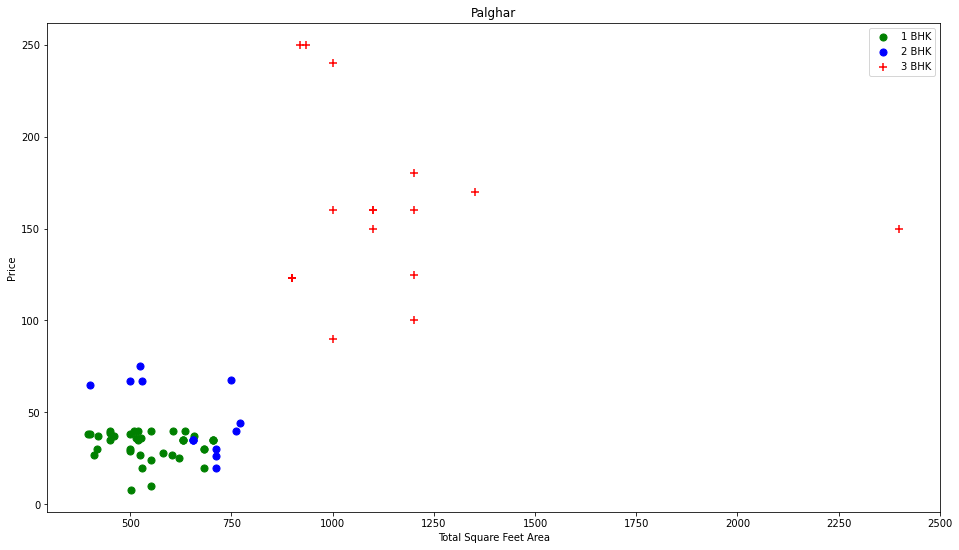

In [266]:
def plot_scatter_chart(df,location):
  bhk1 = df[(df.location==location) & (df.bhk==1)]
  bhk2 = df[(df.location==location) & (df.bhk==2)]
  bhk3 = df[(df.location==location) & (df.bhk==3)]
  plt.figure(figsize=(16,9))
  plt.scatter(bhk1.total_sqft_int, bhk1.price, color='green', label='1 BHK', s=50)
  plt.scatter(bhk2.total_sqft_int, bhk2.price, color='Blue', label='2 BHK', s=50)
  plt.scatter(bhk3.total_sqft_int, bhk3.price, color='Red', label='3 BHK', s=50, marker="+")
  plt.xlabel("Total Square Feet Area")
  plt.ylabel("Price")
  plt.title(location)
  plt.legend()

plot_scatter_chart(data, "Palghar")

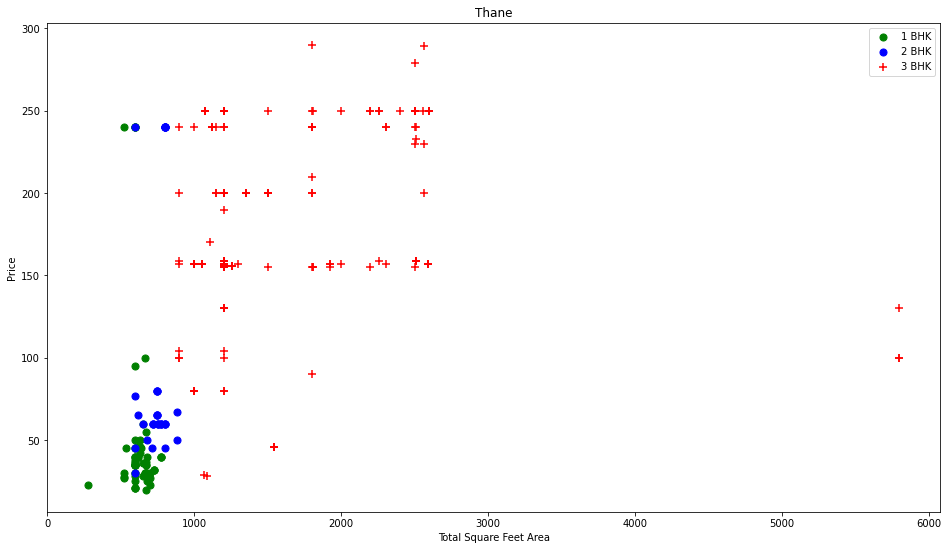

In [267]:
plot_scatter_chart(data, "Thane")

In [268]:
# Removing BHK outliers
def remove_bhk_outliers(df):
  exclude_indices = np.array([])
  for location, location_df in df.groupby('location'): 
    bhk_stats = {}
    for bhk, bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk]={  
          'mean':np.mean(bhk_df.price),
          'std':np.std(bhk_df.price),
          'count':bhk_df.shape[0]}
    for bhk, bhk_df in location_df.groupby('bhk'):
      stats=bhk_stats.get(bhk-1)
      if stats and stats['count']>5:
        exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price<(stats['mean'])].index.values)
  return df.drop(exclude_indices, axis='index')

data = remove_bhk_outliers(data)
data.shape

(1521, 5)

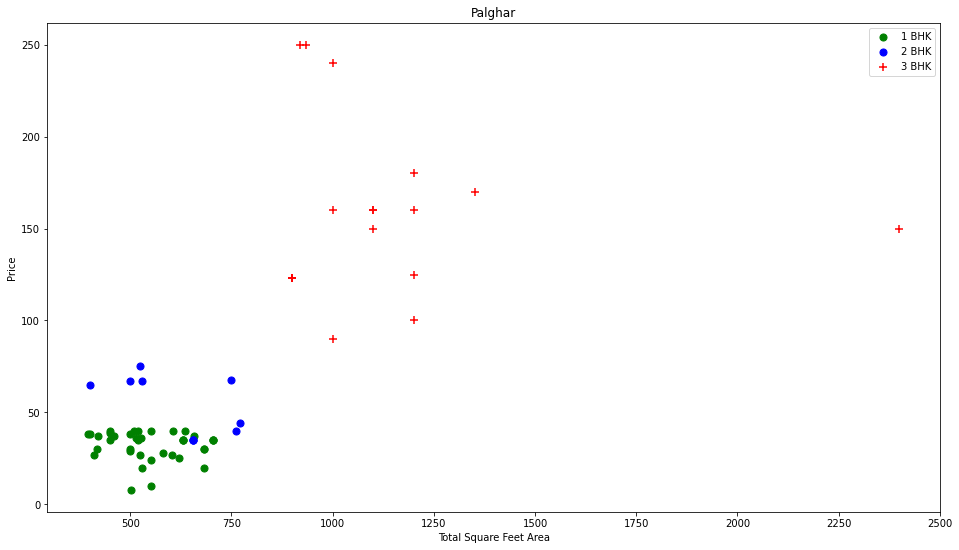

In [269]:
plot_scatter_chart(data, "Palghar")

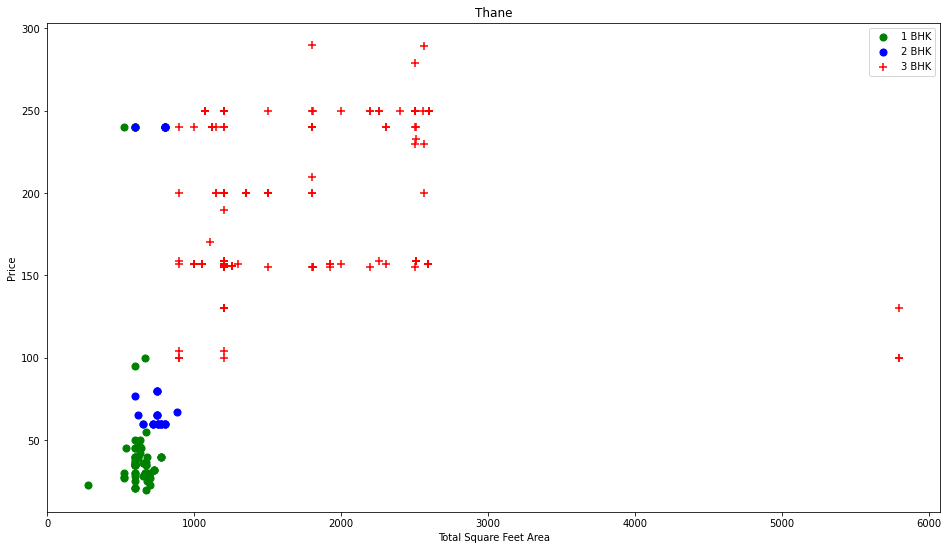

In [270]:
plot_scatter_chart(data, "Thane")

**4.4 Working on <<<< Location >>>> feature**

In [271]:
location_value_count = data['location'].value_counts()
location_value_count

Thane           249
Vangaon         150
Mulund           75
Palghar          65
Andheri          62
               ... 
Charni Rd.        1
Mahalaxmi         1
Kanjurmarg        1
Powai Lake        1
Rutu Enclave      1
Name: location, Length: 67, dtype: int64

In [272]:
location_gert_20 = location_value_count.index
location_gert_20

Index(['Thane', 'Vangaon', 'Mulund', 'Palghar', 'Andheri', 'Mira Road  ',
       'Kalyan', 'Borivali', 'Asangaon  ', 'Malad', 'Mira Road   ', 'Kasara',
       'Dahanu', 'Virar', 'Lower Parel', 'Sion', 'Dronagiri', 'Charni',
       'Nallasopara', 'Dombivali', 'Vasai', 'Diva', 'Currey Rd.', 'Powai',
       'Bhiwandi', 'Badlapur', 'Umroli', 'Matunga', 'Ambernath', 'Khar',
       'Dahisar', 'Churchgate', 'Kurla', 'Santacruz', 'Kelve Rd.', 'Bhandup',
       'Ghatkopar', 'Goregaon', 'Jogeshwari', 'Prabhadevi', 'Bandra',
       'Naigaon', 'Grant Rd.', 'Titwala', 'Nahur', 'Nallasopara East',
       'Vangani', 'Ville Parle', 'Sahkar Nagar', 'Asangaon   ', 'Rawal Pada',
       'karjat', 'Mahim', 'Khopoli', 'Breach Candy', 'Juhu', 'Vakola', 'Worli',
       'Central Avenue', 'Tolaram Colony', 'Dadar', 'Mira Road ', 'Charni Rd.',
       'Mahalaxmi', 'Kanjurmarg', 'Powai Lake', 'Rutu Enclave'],
      dtype='object')

*Categorical Encoding (one hot encoding)*

In [273]:
# pip install category_encoders

In [274]:
# # location count is greter than 19 then we create column of that feature 
# # then if this location present in location feature then set value 1 else 0 
# # (one hot encoding)
data = data.copy()
for var in location_gert_20:
  data['location_'+var]=np.where(data['location']==var, 1,0)
data.shape

(1521, 72)

In [275]:
data.head()

,availability,location,price,bhk,total_sqft_int,location_Thane,location_Vangaon,location_Mulund,location_Palghar,location_Andheri,...,location_Worli,location_Central Avenue,location_Tolaram Colony,location_Dadar,location_Mira Road,location_Charni Rd.,location_Mahalaxmi,location_Kanjurmarg,location_Powai Lake,location_Rutu Enclave
0,Ready To Move,Palghar,150.0,3,2400.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Ready To Move,Vangaon,35.0,1,520.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Ready To Move,Palghar,40.0,1,520.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Ready To Move,Virar,36.0,1,520.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Ready To Move,Palghar,180.0,3,1200.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


**4.5 Working with <<<<< availability >>>>> Feature**

In [276]:
data['availability'].value_counts()

Ready To Move         1093
Under Construction     428
Name: availability, dtype: int64

In [277]:
data = data.copy()
# appy Ohe-Hot  encoding on 'area_type' feature
for var in ["Under Construction","Ready To Move"]:
  data["availability"+var] = np.where(data['availability']==var, 1,0)
data.shape

(1521, 74)

In [278]:
data.head()

,availability,location,price,bhk,total_sqft_int,location_Thane,location_Vangaon,location_Mulund,location_Palghar,location_Andheri,...,location_Tolaram Colony,location_Dadar,location_Mira Road,location_Charni Rd.,location_Mahalaxmi,location_Kanjurmarg,location_Powai Lake,location_Rutu Enclave,availabilityUnder Construction,availabilityReady To Move
0,Ready To Move,Palghar,150.0,3,2400.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,Ready To Move,Vangaon,35.0,1,520.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Ready To Move,Palghar,40.0,1,520.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,Ready To Move,Virar,36.0,1,520.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Ready To Move,Palghar,180.0,3,1200.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [279]:
data = data.drop(['location','availability'], axis =1)
data.shape

(1521, 72)

In [280]:
data.head()

,price,bhk,total_sqft_int,location_Thane,location_Vangaon,location_Mulund,location_Palghar,location_Andheri,location_Mira Road,location_Kalyan,...,location_Tolaram Colony,location_Dadar,location_Mira Road,location_Charni Rd.,location_Mahalaxmi,location_Kanjurmarg,location_Powai Lake,location_Rutu Enclave,availabilityUnder Construction,availabilityReady To Move
0,150.0,3,2400.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,35.0,1,520.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,40.0,1,520.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,36.0,1,520.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,180.0,3,1200.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [281]:
data.describe()

,price,bhk,total_sqft_int,location_Thane,location_Vangaon,location_Mulund,location_Palghar,location_Andheri,location_Mira Road,location_Kalyan,...,location_Tolaram Colony,location_Dadar,location_Mira Road,location_Charni Rd.,location_Mahalaxmi,location_Kanjurmarg,location_Powai Lake,location_Rutu Enclave,availabilityUnder Construction,availabilityReady To Move
count,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,...,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000
mean,97.692965,1.978961,896.855299,0.163708,0.098619,0.049310,0.042735,0.040763,0.038790,0.036160,...,0.001315,0.001315,0.000657,0.000657,0.000657,0.000657,0.000657,0.000657,0.281394,0.718606
std,79.382844,0.898583,468.263977,0.370132,0.298248,0.216585,0.202326,0.197805,0.193158,0.186751,...,0.036250,0.036250,0.025641,0.025641,0.025641,0.025641,0.025641,0.025641,0.449827,0.449827
min,8.000000,1.000000,250.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.820000,1.000000,630.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,60.000000,2.000000,750.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,157.000000,3.000000,1110.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,460.000000,3.000000,5800.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**4.6 Finding Outlier and Removing Using box Plot** 
**(Handling Outlier)**

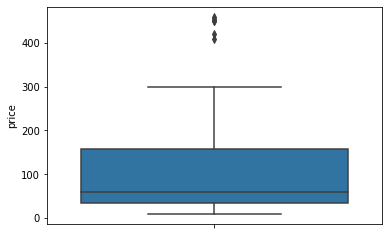

In [282]:
sns.boxplot(y='price', data=data)

In [283]:
data['price'].mean()

97.69296515450361

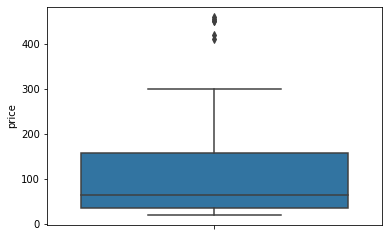

In [284]:
data = data[data['price']>20]
sns.boxplot(y='price',data=data)

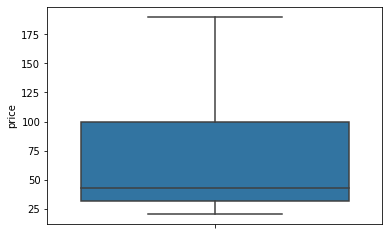

In [285]:
data = data[data['price']<200]
sns.boxplot(y='price',data=data)

In [286]:
data.describe()

,price,bhk,total_sqft_int,location_Thane,location_Vangaon,location_Mulund,location_Palghar,location_Andheri,location_Mira Road,location_Kalyan,...,location_Tolaram Colony,location_Dadar,location_Mira Road,location_Charni Rd.,location_Mahalaxmi,location_Kanjurmarg,location_Powai Lake,location_Rutu Enclave,availabilityUnder Construction,availabilityReady To Move
count,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,...,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000
mean,71.188452,1.817963,819.329519,0.129110,0.105854,0.052125,0.046512,0.041700,0.043304,0.039294,...,0.001604,0.000802,0.000802,0.000802,0.000802,0.000802,0.000802,0.000802,0.325581,0.674419
std,50.440211,0.860996,418.953273,0.335456,0.307774,0.222368,0.210675,0.199983,0.203622,0.194372,...,0.040032,0.028318,0.028318,0.028318,0.028318,0.028318,0.028318,0.028318,0.468780,0.468780
min,20.300000,1.000000,250.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,606.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,42.870000,2.000000,697.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,100.000000,3.000000,922.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,190.000000,3.000000,5800.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


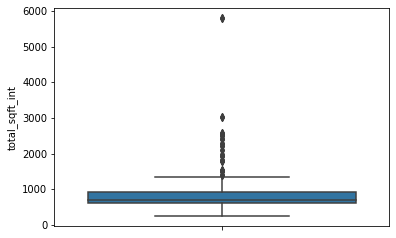

In [287]:
sns.boxplot(y='total_sqft_int',data=data)

In [288]:
data['total_sqft_int'].mean()

819.3295188452286

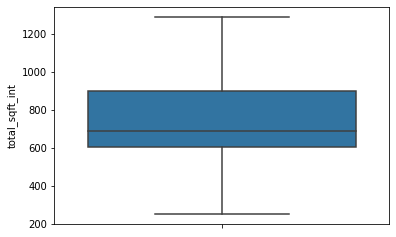

In [289]:
data = data[data['total_sqft_int']<1300]
sns.boxplot(y='total_sqft_int',data=data)

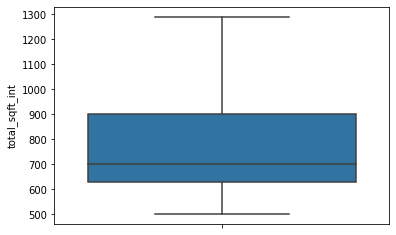

In [290]:
data = data[data['total_sqft_int']>=500]
sns.boxplot(y='total_sqft_int',data=data)

In [291]:
data.describe()

,price,bhk,total_sqft_int,location_Thane,location_Vangaon,location_Mulund,location_Palghar,location_Andheri,location_Mira Road,location_Kalyan,...,location_Tolaram Colony,location_Dadar,location_Mira Road,location_Charni Rd.,location_Mahalaxmi,location_Kanjurmarg,location_Powai Lake,location_Rutu Enclave,availabilityUnder Construction,availabilityReady To Move
count,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,...,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000
mean,70.256832,1.817282,786.802349,0.123312,0.100810,0.051305,0.041404,0.045005,0.045905,0.037804,...,0.001800,0.000900,0.000900,0.000900,0.000900,0.000900,0.000900,0.000900,0.334833,0.665167
std,49.483440,0.851024,214.978289,0.328943,0.301213,0.220719,0.199313,0.207407,0.209372,0.190807,...,0.042409,0.030002,0.030002,0.030002,0.030002,0.030002,0.030002,0.030002,0.472145,0.472145
min,20.300000,1.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,630.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43.300000,2.000000,700.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,100.000000,3.000000,902.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,190.000000,3.000000,1290.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


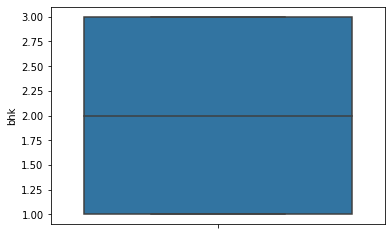

In [292]:
sns.boxplot(y='bhk',data=data)

In [293]:
data.describe()

,price,bhk,total_sqft_int,location_Thane,location_Vangaon,location_Mulund,location_Palghar,location_Andheri,location_Mira Road,location_Kalyan,...,location_Tolaram Colony,location_Dadar,location_Mira Road,location_Charni Rd.,location_Mahalaxmi,location_Kanjurmarg,location_Powai Lake,location_Rutu Enclave,availabilityUnder Construction,availabilityReady To Move
count,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,...,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000
mean,70.256832,1.817282,786.802349,0.123312,0.100810,0.051305,0.041404,0.045005,0.045905,0.037804,...,0.001800,0.000900,0.000900,0.000900,0.000900,0.000900,0.000900,0.000900,0.334833,0.665167
std,49.483440,0.851024,214.978289,0.328943,0.301213,0.220719,0.199313,0.207407,0.209372,0.190807,...,0.042409,0.030002,0.030002,0.030002,0.030002,0.030002,0.030002,0.030002,0.472145,0.472145
min,20.300000,1.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,630.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43.300000,2.000000,700.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,100.000000,3.000000,902.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,190.000000,3.000000,1290.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [294]:
data.head()

,price,bhk,total_sqft_int,location_Thane,location_Vangaon,location_Mulund,location_Palghar,location_Andheri,location_Mira Road,location_Kalyan,...,location_Tolaram Colony,location_Dadar,location_Mira Road,location_Charni Rd.,location_Mahalaxmi,location_Kanjurmarg,location_Powai Lake,location_Rutu Enclave,availabilityUnder Construction,availabilityReady To Move
1,35.0,1,520.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,40.0,1,520.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,36.0,1,520.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,180.0,3,1200.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,40.0,1,633.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [295]:
data.tail()

,price,bhk,total_sqft_int,location_Thane,location_Vangaon,location_Mulund,location_Palghar,location_Andheri,location_Mira Road,location_Kalyan,...,location_Tolaram Colony,location_Dadar,location_Mira Road,location_Charni Rd.,location_Mahalaxmi,location_Kanjurmarg,location_Powai Lake,location_Rutu Enclave,availabilityUnder Construction,availabilityReady To Move
1758,130.0,3,938.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1759,130.0,3,1200.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1760,130.0,3,1200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1761,130.0,3,1200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1762,130.0,3,1200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [296]:
data.sort_values('total_sqft_int', inplace=True) 

In [297]:
data.head()

,price,bhk,total_sqft_int,location_Thane,location_Vangaon,location_Mulund,location_Palghar,location_Andheri,location_Mira Road,location_Kalyan,...,location_Tolaram Colony,location_Dadar,location_Mira Road,location_Charni Rd.,location_Mahalaxmi,location_Kanjurmarg,location_Powai Lake,location_Rutu Enclave,availabilityUnder Construction,availabilityReady To Move
539,40.0,1,500.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
50,36.9,1,500.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
49,36.9,1,500.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
44,67.0,2,500.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
95,38.0,1,500.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [298]:
data.to_csv('Cleanned_Karthik.Darvesh_Dataset.csv', index=False) 

In [299]:
# pd.set_option("display.max_columns", None)
# pd.set_option("display.max_rows", None)

In [300]:
df = pd.read_csv('Cleanned_Karthik.Darvesh_Dataset.csv')
df.shape

(1111, 72)

In [301]:
df.head()

,price,bhk,total_sqft_int,location_Thane,location_Vangaon,location_Mulund,location_Palghar,location_Andheri,location_Mira Road,location_Kalyan,...,location_Tolaram Colony,location_Dadar,location_Mira Road,location_Charni Rd.,location_Mahalaxmi,location_Kanjurmarg,location_Powai Lake,location_Rutu Enclave,availabilityUnder Construction,availabilityReady To Move
0,40.0,1,500.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,36.9,1,500.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,36.9,1,500.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,67.0,2,500.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,38.0,1,500.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


**5. Split Dataset in train and test**

In [302]:
X = df.drop("price", axis=1)
y = df['price']
print('Shape of X = ', X.shape)
print('Shape of y = ', y.shape)

Shape of X =  (1111, 71)
Shape of y =  (1111,)


In [303]:
print(X)

      bhk  total_sqft_int  location_Thane  location_Vangaon  location_Mulund  \
0       1           500.0               0                 0                0   
1       1           500.0               0                 0                0   
2       1           500.0               0                 0                0   
3       2           500.0               0                 0                0   
4       1           500.0               0                 1                0   
...   ...             ...             ...               ...              ...   
1106    3          1258.0               1                 0                0   
1107    3          1258.0               1                 0                0   
1108    3          1258.0               1                 0                0   
1109    3          1280.0               0                 0                0   
1110    3          1290.0               0                 1                0   

      location_Palghar  location_Andher

In [304]:
print(y)

0        40.0
1        36.9
2        36.9
3        67.0
4        38.0
        ...  
1106    156.0
1107    156.0
1108    156.0
1109    157.0
1110     80.0
Name: price, Length: 1111, dtype: float64


In [305]:
#import train_test_split
from sklearn.model_selection import train_test_split

#Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 51)


print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (888, 71)
Shape of y_train =  (888,)
Shape of X_test =  (223, 71)
Shape of y_test =  (223,)


In [306]:
print(X_train)

      bhk  total_sqft_int  location_Thane  location_Vangaon  location_Mulund  \
419     1           661.0               0                 1                0   
122     1           595.0               0                 0                1   
311     2           640.0               0                 0                0   
772     2           875.0               0                 0                0   
1003    3          1200.0               1                 0                0   
...   ...             ...             ...               ...              ...   
933     3          1050.0               0                 1                0   
528     1           693.0               0                 0                0   
485     1           675.0               1                 0                0   
57      1           525.0               0                 0                1   
1022    3          1200.0               1                 0                0   

      location_Palghar  location_Andher

In [307]:
print(X_test)

      bhk  total_sqft_int  location_Thane  location_Vangaon  location_Mulund  \
639     2           750.0               0                 0                0   
533     1           697.0               1                 0                0   
1087    3          1200.0               0                 0                0   
25      1           500.0               0                 1                0   
740     2           830.0               0                 0                0   
...   ...             ...             ...               ...              ...   
281     1           630.0               1                 0                0   
653     2           760.0               0                 0                0   
992     3          1200.0               0                 0                0   
598     2           712.0               0                 0                1   
482     1           674.0               0                 0                0   

      location_Palghar  location_Andher

**6. Feature Scaling**

In [308]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train= sc.transform(X_train)
X_test = sc.transform(X_test)

In [309]:
print(X_train)

[[-0.9593985  -0.58604606 -0.36619615 ...  0.          1.38949382
  -1.38949382]
 [-0.9593985  -0.89558739 -0.36619615 ...  0.         -0.71968654
   0.71968654]
 [ 0.21569925 -0.68453648 -0.36619615 ...  0.         -0.71968654
   0.71968654]
 ...
 [-0.9593985  -0.52038578  2.73077697 ...  0.         -0.71968654
   0.71968654]
 [-0.9593985  -1.2238888  -0.36619615 ...  0.         -0.71968654
   0.71968654]
 [ 1.39079701  1.94187479  2.73077697 ...  0.         -0.71968654
   0.71968654]]


In [310]:
print(X_test)

[[ 0.21569925 -0.16863427 -0.36619615 ...  0.         -0.71968654
   0.71968654]
 [-0.9593985  -0.41720534  2.73077697 ...  0.          1.38949382
  -1.38949382]
 [ 1.39079701  1.94187479 -0.36619615 ...  0.         -0.71968654
   0.71968654]
 ...
 [ 1.39079701  1.94187479 -0.36619615 ...  0.          1.38949382
  -1.38949382]
 [ 0.21569925 -0.34685503 -0.36619615 ...  0.          1.38949382
  -1.38949382]
 [-0.9593985  -0.5250758  -0.36619615 ...  0.         -0.71968654
   0.71968654]]


**7. Machine Learning Model Training**

# 1. Linear Regression

In [311]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr_lasso = Lasso()
lr_ridge = Ridge()

In [312]:
def rmse(y_test, y_pred):
  return np.sqrt(mean_squared_error(y_test, y_pred))

In [313]:
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test) 
lr_rmse = rmse(y_test, lr.predict(X_test))
lr_score, lr_rmse

(-5.703536519956956e+21, 3788359790679.7275)

In [314]:
# Lasso 
lr_lasso.fit(X_train, y_train)
lr_lasso_score=lr_lasso.score(X_test, y_test)  
lr_lasso_rmse = rmse(y_test, lr_lasso.predict(X_test))
lr_lasso_score, lr_lasso_rmse

(0.8135448915756252, 21.660388821584718)

## Support Vector Machine

In [315]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,y_train)
svr_score=svr.score(X_test,y_test) # with 0.2630802200711362
svr_rmse = rmse(y_test, svr.predict(X_test))
svr_score, svr_rmse

(0.21366207825968841, 44.48193951516336)

## Random Forest Algorithm




In [316]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
rfr_score=rfr.score(X_test,y_test) # with 0.8863376025408044
rfr_rmse = rmse(y_test, rfr.predict(X_test))
rfr_score, rfr_rmse

(0.9144813286828939, 14.669306317966678)

## XGBoost Algorithm

In [317]:
import xgboost
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train,y_train)
xgb_reg_score=xgb_reg.score(X_test,y_test) # with 0.8838865742273464
xgb_reg_rmse = rmse(y_test, xgb_reg.predict(X_test))
xgb_reg_score, xgb_reg_rmse

[13:05:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.9036623821300945, 15.569585714318478)

In [318]:
print(pd.DataFrame([{'Model': 'Linear Regression','Score':lr_score, "RMSE":lr_rmse},
              {'Model': 'Lasso','Score':lr_lasso_score, "RMSE":lr_lasso_rmse},
              {'Model': 'Support Vector Machine','Score':svr_score, "RMSE":svr_rmse},
              {'Model': 'Random Forest','Score':rfr_score, "RMSE":rfr_rmse},
              {'Model': 'XGBoost','Score':xgb_reg_score, "RMSE":xgb_reg_rmse}],
             columns=['Model','Score','RMSE']))

                    Model         Score          RMSE
0       Linear Regression -5.703537e+21  3.788360e+12
1                   Lasso  8.135449e-01  2.166039e+01
2  Support Vector Machine  2.136621e-01  4.448194e+01
3           Random Forest  9.144813e-01  1.466931e+01
4                 XGBoost  9.036624e-01  1.556959e+01


In [319]:
# import plotly.express as px

In [320]:
# fig5 =px.line(data_frame=RMSE.reset_index(),
#         x='index',y=['Training','Testing'],
#         title='Root mean square error for training and testing')
# fig5.update_yaxes(range=[-0.4, 1])

In [321]:
y_pred = lr.predict(X_test)
y_pred

array([ 7.86614060e+01,  3.27336716e+01,  1.44124297e+02,  1.36867966e+01,
        7.86516404e+01,  3.22219529e+01,  7.72805466e+01,  1.49928984e+02,
        2.25969529e+01,  1.38644804e+02,  1.35749297e+02, -1.14585528e+12,
        1.44405547e+02,  3.16086716e+01,  3.70188279e+01,  7.74621872e+01,
        7.98469529e+01,  1.23827422e+02,  2.51633591e+01,  7.13938279e+01,
        3.28655076e+01,  1.49268828e+02,  1.38241484e+02,  1.39011015e+02,
        6.58703904e+01,  3.70188279e+01,  1.53210234e+02,  8.77805466e+01,
        3.87219529e+01,  2.64485154e+01,  1.05889922e+02,  2.44719529e+01,
        1.17862578e+02,  4.81125779e+01,  7.43000779e+01,  1.40596953e+02,
        8.48171849e+00,  1.32432890e+02,  8.36321091e+01,  2.71594529e+01,
        1.44758591e+01,  5.36535935e+01,  8.22141404e+01,  3.44875779e+01,
        1.44405547e+02,  4.35188279e+01,  2.97063279e+01,  1.19604765e+02,
        5.87375779e+01,  1.04950468e+02,  3.99944334e+13,  2.67258591e+01,
        3.76594529e+01,  

In [322]:
y_test

639      60.0
533      27.0
1087    160.0
25       25.0
740      65.0
        ...  
281      46.0
653      51.5
992     125.0
598      45.0
482      37.0
Name: price, Length: 223, dtype: float64

In [323]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-5.703536519956956e+21

## Random Forest Algorithm Cross Validation

In [324]:
from sklearn.model_selection import cross_val_score
cvs_rfr2 = cross_val_score(RandomForestRegressor(), X_train,y_train, cv = 10)
cvs_rfr2, cvs_rfr2.mean()

(array([0.9319168 , 0.96580889, 0.97345278, 0.93621715, 0.88300489,
        0.93895787, 0.88595028, 0.95675877, 0.82892824, 0.85964273]),
 0.9160638396021973)

# XGBRegressor 

# Hyper Parmeter Tuning

In [325]:
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [326]:
#RandomForestRegressor Hyper Parmeter Tuning
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train) 
rfr.score(X_test,y_test)

0.9164675780579232

In [327]:
#XGBRegressor Hyper Parmeter Tuning
xgb_tune2 =  XGBRegressor()
xgb_tune2.fit(X_train,y_train) 
xgb_tune2.score(X_test,y_test)

[13:05:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9036623821300945

# XGBoost Algorithm Cross Validation

In [328]:
cvs = cross_val_score(xgb_tune2, X_train,y_train, cv = 5)
cvs, cvs.mean() #  0.9706000326331659'''

[13:05:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:05:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:05:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:05:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:05:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(array([0.93500311, 0.92508064, 0.93329681, 0.92405939, 0.83228766]),
 0.9099455201965249)

In [329]:
np.sqrt(mean_squared_error(y_test, xgb_tune2.predict(X_test)))

15.569585714318478

In [330]:
np.sqrt(mean_squared_error(y_test, rfr.predict(X_test)))

14.497951474914911

In [331]:
list(X.columns)

['bhk',
 'total_sqft_int',
 'location_Thane',
 'location_Vangaon',
 'location_Mulund',
 'location_Palghar',
 'location_Andheri',
 'location_Mira Road  ',
 'location_Kalyan',
 'location_Borivali',
 'location_Asangaon  ',
 'location_Malad',
 'location_Mira Road   ',
 'location_Kasara',
 'location_Dahanu',
 'location_Virar',
 'location_Lower Parel',
 'location_Sion',
 'location_Dronagiri',
 'location_Charni',
 'location_Nallasopara',
 'location_Dombivali',
 'location_Vasai',
 'location_Diva',
 'location_Currey Rd.',
 'location_Powai',
 'location_Bhiwandi',
 'location_Badlapur',
 'location_Umroli',
 'location_Matunga',
 'location_Ambernath',
 'location_Khar',
 'location_Dahisar',
 'location_Churchgate',
 'location_Kurla',
 'location_Santacruz',
 'location_Kelve Rd.',
 'location_Bhandup',
 'location_Ghatkopar',
 'location_Goregaon',
 'location_Jogeshwari',
 'location_Prabhadevi',
 'location_Bandra',
 'location_Naigaon',
 'location_Grant Rd.',
 'location_Titwala',
 'location_Nahur',
 'locati

In [332]:
# it help to get predicted value of hosue  by providing features value 
def predict_house_price(model,location, bhk, total_sqft_int, availability):

  x =np.zeros(len(X.columns)) # create zero numpy array, len = 107 as input value for model

  # adding feature's value accorind to their column index
  x[0] = bhk
  x[1] = total_sqft_int
  

  if 'location_' + location in X.columns:
        loc_index = np.where(X.columns == "location_" + location)[0][0]
        x[loc_index] = 1

  if 'availability' + availability in X.columns:
        availability_index = np.where(X.columns == "availability" + availability)[0][0]
        x[availability_index] = 1

    # print(loc_index)

  #print(x)

  # # feature scaling
  x = sc.transform([x])[0] # give 2d np array for feature scaling and get 1d scaled np array
  # #print(x)

  return model.predict([x])[0] # return the predicted value by train XGBoost model

In [333]:
predict_house_price(model=xgb_tune2,location="Thane", bhk=3, total_sqft_int=1500, availability='Ready To Move' )

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


107.32684

In [334]:
predict_house_price(model=rfr,location="Thane", bhk=3, total_sqft_int=1500,  availability='Ready To Move' )

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


120.44807586982161

# Save model & load model

In [335]:
import joblib
# save model
joblib.dump(xgb_tune2, 'xgboost_house_price_prediction_model.pkl')
joblib.dump(rfr, 'random_forest_house_price_prediction_rfr_model.pkl')

['random_forest_house_price_prediction_rfr_model.pkl']

In [336]:
# Load Model Xgboost
xgboost_house_price_prediction_model = joblib.load("xgboost_house_price_prediction_model.pkl")

[13:05:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [337]:
# Load Model Random_Forest
random_forest_house_price_prediction_model = joblib.load("random_forest_house_price_prediction_rfr_model.pkl")

In [338]:
# Predict House Price XGBoost
predict_house_price(xgboost_house_price_prediction_model,location="Thane", bhk=1, total_sqft_int=600,  availability='Ready To Move')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


39.32167

In [339]:
# Predict House Price Random-Forest
predict_house_price(random_forest_house_price_prediction_model,location="Thane", bhk=1, total_sqft_int=600, availability='Ready To Move')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


37.334845660058875

In [340]:
# import json

In [341]:
# xgb_tune2.save_model("bangalore_house_price_prediction_model.json")

In [342]:
# xgb_tune2 = xgboost.XGBRegressor()
# xgb_tune2.load_model("bangalore_house_price_prediction_model.json")